In [1]:
!pip install transformers -q
!pip install sentencepiece -q

In [2]:
import pandas as pd
from transformers import AutoModel, AutoTokenizer

import sys
# For running via Colab
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from bert_finetuner import *

In [3]:
data = pd.read_json('/content/drive/MyDrive/song_lyric_map.json')
#data = pd.read_json('https://raw.githubusercontent.com/pradeep-miriyala/multi-modal-bert-models/main/data/song_lyric_map.json?token=ADXRNFRS46PTRG46WUZLXHDBKH7HY')
data['iGenre'] = data.apply(lambda x:int(x.Genre=='Devotional'),axis=1)

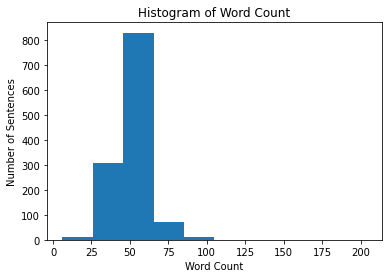

In [4]:
seq_lens = [len(l.split()) for l in data['Lyric']]
plt.hist(seq_lens)
plt.xlabel('Word Count')
plt.ylabel('Number of Sentences')
plt.title('Histogram of Word Count')
plt.show()

##### From the histogram, it is evident that most of the sentences have 50 words and some have 75. Although there are sentences with 100 words, the perecentage is very minimal. Hence maximum sequence length is considered as 75.

In [5]:
MAX_SEQ_LEN = 75
gpu = torch.device("cuda")
cpu = torch.device("cpu")

In [6]:
chk_point = 'ai4bharat/indic-bert'
indic_model = AutoModel.from_pretrained(chk_point)
tokenizer = AutoTokenizer.from_pretrained(chk_point)

for param in indic_model.parameters(): 
  param.requires_grad = False

Some weights of the model checkpoint at ai4bharat/indic-bert were not used when initializing AlbertModel: ['predictions.bias', 'predictions.LayerNorm.weight', 'predictions.dense.bias', 'predictions.LayerNorm.bias', 'sop_classifier.classifier.weight', 'predictions.decoder.weight', 'sop_classifier.classifier.bias', 'predictions.decoder.bias', 'predictions.dense.weight']
- This IS expected if you are initializing AlbertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing AlbertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
sequences, attention_masks, targets = process_data_w_base_model(data, tokenizer, max_seq_len=MAX_SEQ_LEN)

In [10]:
txt_results = k_fold_model_preparation(indic_model, gpu, data, sequences, attention_masks, targets, fusion=False,
                                       k_folds=5, epochs=10, balance_classes=True, dropout_level=0.1, lr=1e-4, max_seq_len=MAX_SEQ_LEN)

Running Text Only Classification
FOLD 0
--------------------------------
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.689 / Validation : 0.630
Epoch 2 / 10
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.632 / Validation : 0.565
Epoch 3 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.594 / Validation : 0.568
Epoch 4 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.562 / Validation : 0.541
Epoch 5 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.532 / Validation : 0.542
Epoch 6 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.507 / Validation : 0.523
Epoch 7 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.494 / Validation : 0.512
Epoch 8 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.453 / Validation : 0.575
Epoch 9 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.465 / Validation : 0.513
Epoch 10 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.387 / Validation : 0.584
On Train Data
              precision    recal

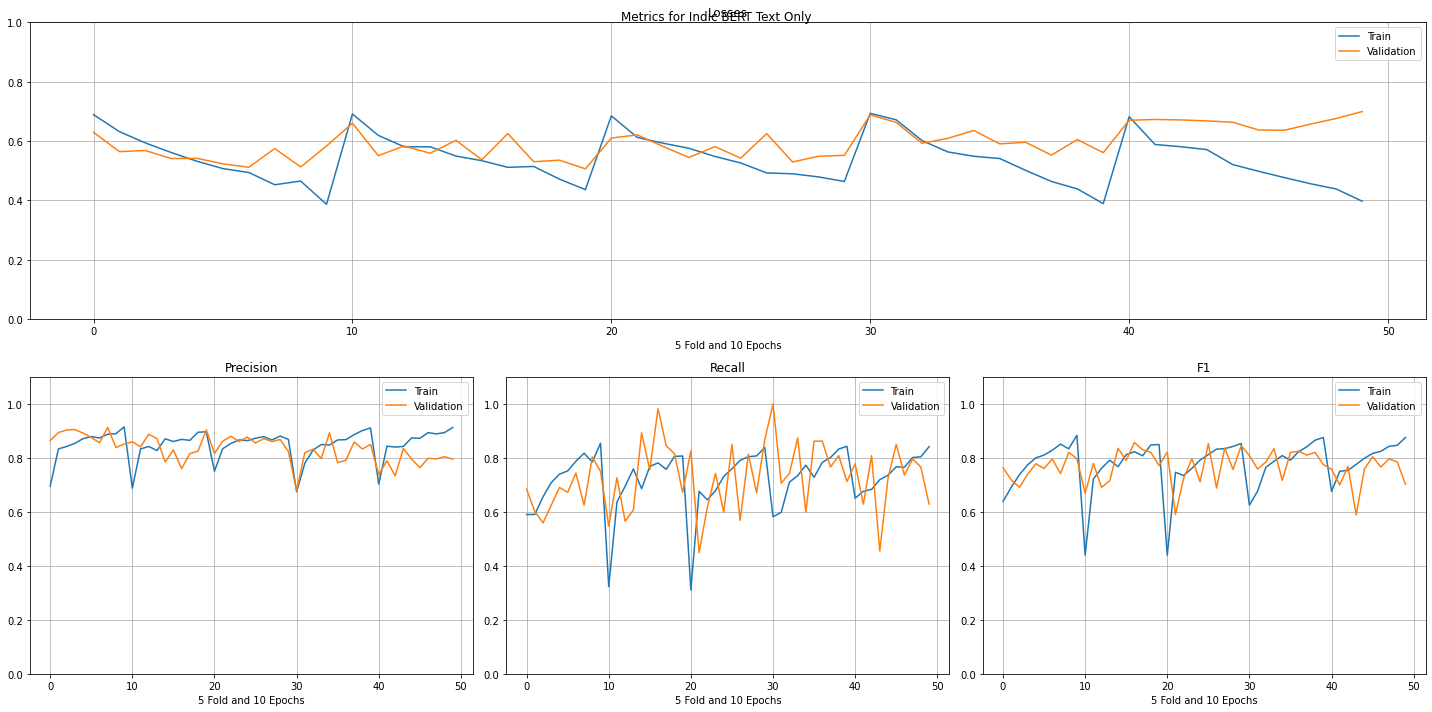

In [11]:
plot_results(txt_results, 'Indic BERT Text Only')

In [13]:
fusion_results = k_fold_model_preparation(indic_model, gpu, data, sequences, attention_masks, targets, fusion=True,
                                       k_folds=5, epochs=10, balance_classes=True, dropout_level=0.1, lr=1e-4, max_seq_len=MAX_SEQ_LEN)

Running Fusion Model
FOLD 0
--------------------------------
Class Weights : [1.55520505 0.73692078]
Epoch 1 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.693 / Validation : 0.688
Epoch 2 / 10
Training Model


/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


  Batch    50  of     62.
Evaluating
Losses - Train : 0.683 / Validation : 0.646
Epoch 3 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.681 / Validation : 0.643
Epoch 4 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.660 / Validation : 0.640
Epoch 5 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.645 / Validation : 0.611
Epoch 6 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.640 / Validation : 0.593
Epoch 7 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.632 / Validation : 0.597
Epoch 8 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.668 / Validation : 0.685
Epoch 9 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.690 / Validation : 0.685
Epoch 10 / 10
Training Model
  Batch    50  of     62.
Evaluating
Losses - Train : 0.688 / Validation : 0.681
On Train Data
              precision    recal

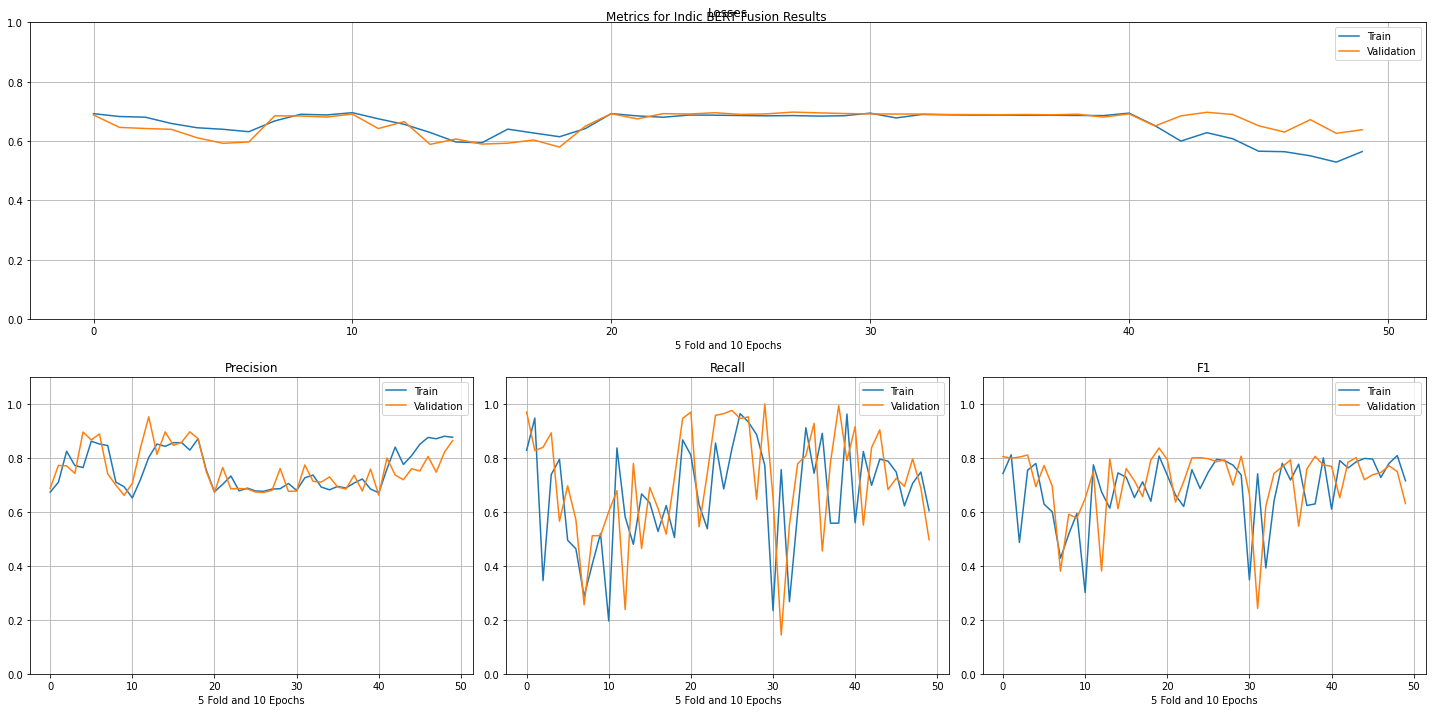

In [14]:
plot_results(fusion_results,'Indic BERT Fusion Results')